# 1.Import librarys And load House_value_prediction.csv

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
data=pd.read_csv("House_Value_Prediction.csv")
print(data)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41          880           129.0   
1        -122.22     37.86                  21         7099          1106.0   
2        -122.24     37.85                  52         1467           190.0   
3        -122.25     37.85                  52         1274           235.0   
4        -122.25     37.85                  52         1627           280.0   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25         1665           374.0   
20636    -121.21     39.49                  18          697           150.0   
20637    -121.22     39.43                  17         2254           485.0   
20638    -121.32     39.43                  18         1860           409.0   
20639    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  media

# 2.Dataset inspection And Cleaning 

In [2]:
data.shape

(20640, 10)

In [3]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  int64  
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [5]:
data=data.dropna()

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  int64  
 3   total_rooms         20433 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  int64  
 6   households          20433 non-null  int64  
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  int64  
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.7+ MB


In [7]:
data.shape

(20433, 10)

In [8]:
int(data.duplicated().mean())

0

In [9]:
data.sample(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
7790,-118.07,33.89,17,2223,544.0,2008,512,3.0777,160800,<1H OCEAN
19671,-120.83,37.52,6,1488,252.0,773,259,4.1859,150000,INLAND
9399,-122.56,37.90,48,1550,253.0,641,276,8.6340,463500,NEAR BAY
15861,-122.39,37.76,52,3390,691.0,1645,596,3.7051,253700,NEAR BAY
3965,-118.56,34.19,36,2600,441.0,1246,426,4.1111,215600,<1H OCEAN
12765,-121.41,38.62,21,3260,763.0,1735,736,2.5162,97500,INLAND
11265,-117.98,33.79,35,2356,478.0,1659,480,4.1115,179700,<1H OCEAN
12711,-121.40,38.59,25,2228,534.0,1130,481,2.5363,124600,INLAND
17433,-120.45,34.65,25,980,276.0,896,245,2.0000,87500,NEAR OCEAN
17189,-122.27,37.32,37,2607,534.0,1346,507,5.3951,277700,NEAR OCEAN


In [77]:
data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [79]:
num_df=data.select_dtypes(include=["int64","float64"])

In [80]:
num_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,6.781058,4.867534,5.777652,4.844187,2.232720,452600
1,-122.22,37.86,21,8.867850,7.009409,7.784057,7.037906,2.230165,358500
2,-122.24,37.85,52,7.291656,5.252273,6.208590,5.181784,2.111110,352100
3,-122.25,37.85,52,7.150701,5.463832,6.326149,5.393628,1.893579,341300
4,-122.25,37.85,52,7.395108,5.638355,6.338594,5.560682,1.578195,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,7.418181,5.926926,6.740519,5.802118,0.940124,78100
20636,-121.21,39.49,18,6.548219,5.017280,5.877736,4.744932,1.268861,77100
20637,-121.22,39.43,17,7.720905,6.186209,6.915723,6.073045,0.993252,92300
20638,-121.32,39.43,18,7.528869,6.016157,6.609349,5.857933,1.053336,84700


In [81]:
corr_matrix=num_df.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.030566,0.064265,0.120064,0.059811,-0.015739,-0.045741
latitude,-0.924616,1.000000,0.011899,-0.032019,-0.071200,-0.144726,-0.091243,-0.086016,-0.145966
housing_median_age,-0.109357,0.011899,1.000000,-0.343130,-0.296416,-0.270692,-0.267997,-0.140863,0.105237
total_rooms,0.030566,-0.032019,-0.343130,1.000000,0.933833,0.846359,0.921575,0.271157,0.176633
total_bedrooms,0.064265,-0.071200,-0.296416,0.933833,1.000000,0.888749,0.975188,0.011058,0.060804
population,0.120064,-0.144726,-0.270692,0.846359,0.888749,1.000000,0.922547,0.023898,-0.026002
households,0.059811,-0.091243,-0.267997,0.921575,0.975188,0.922547,1.000000,0.044709,0.081367
median_income,-0.015739,-0.086016,-0.140863,0.271157,0.011058,0.023898,0.044709,1.000000,0.670145
median_house_value,-0.045741,-0.145966,0.105237,0.176633,0.060804,-0.026002,0.081367,0.670145,1.000000


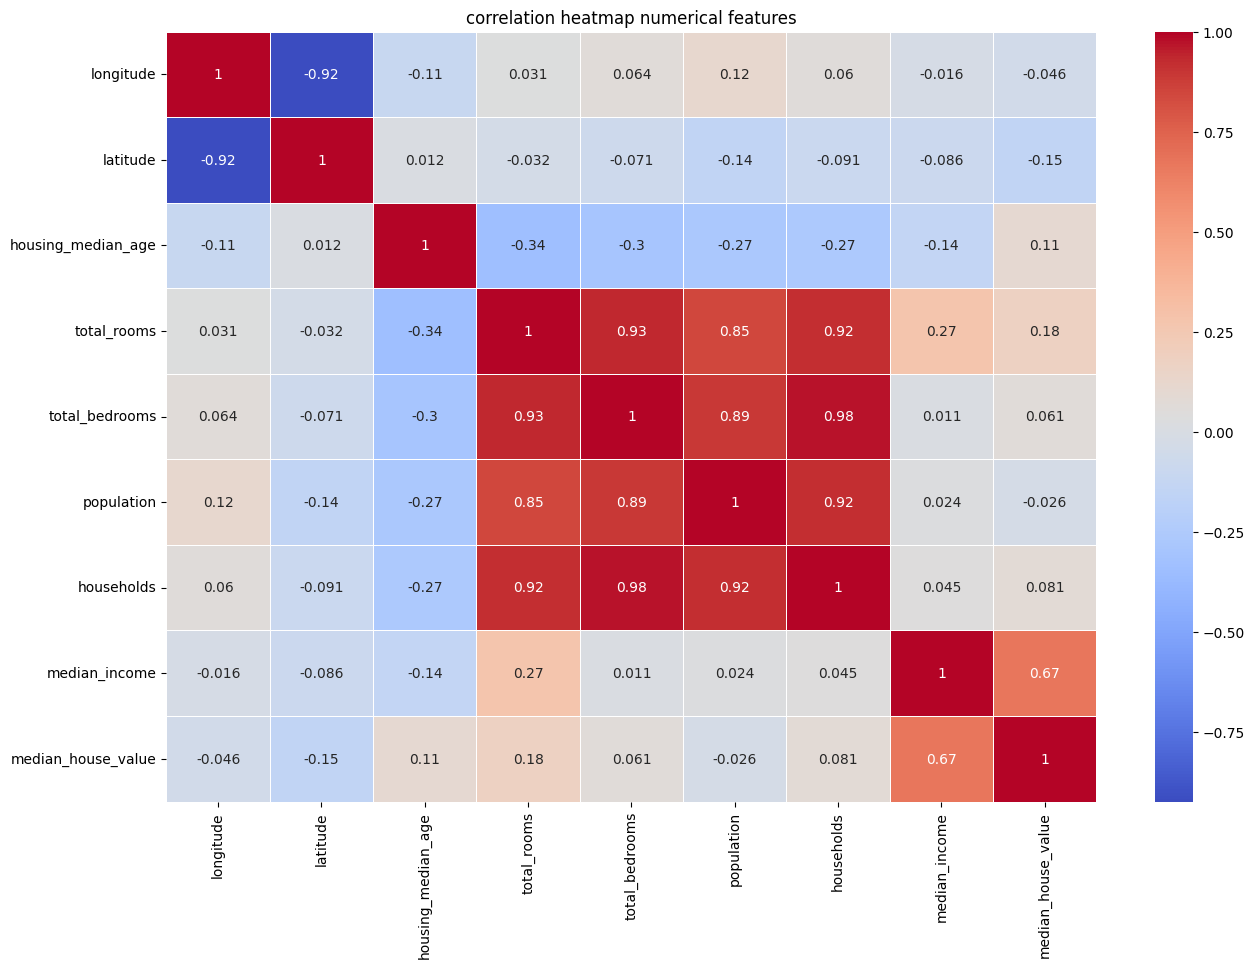

In [83]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,cmap="coolwarm",annot=True,linewidth=0.5)
plt.title("correlation heatmap numerical features")
plt.show()

In [84]:
target_corr = corr_matrix["median_house_value"].sort_values(ascending=False)
target_corr

median_house_value    1.000000
median_income         0.670145
total_rooms           0.176633
housing_median_age    0.105237
households            0.081367
total_bedrooms        0.060804
population           -0.026002
longitude            -0.045741
latitude             -0.145966
Name: median_house_value, dtype: float64

# 3.Handling Outliers

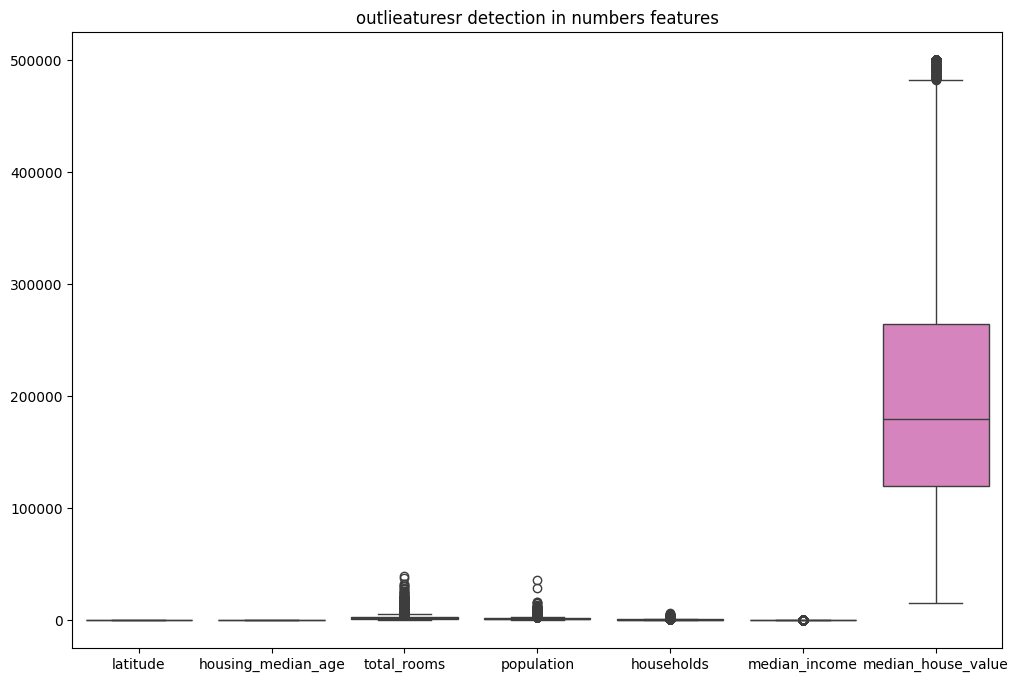

In [11]:
num_cols=["latitude","housing_median_age","total_rooms","population","households","median_income","median_house_value"]
plt.figure(figsize=(12, 8))
sns.boxplot(data=data[num_cols])
plt.title("outlieaturesr detection in numbers features")
plt.show()


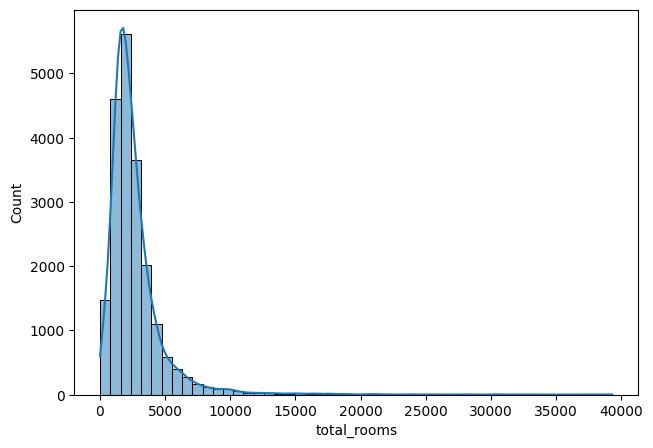

In [12]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.histplot(data["total_rooms"], bins=50, kde=True
)
plt.show()

In [13]:
data["total_rooms"].skew()

np.float64(4.158816422767309)

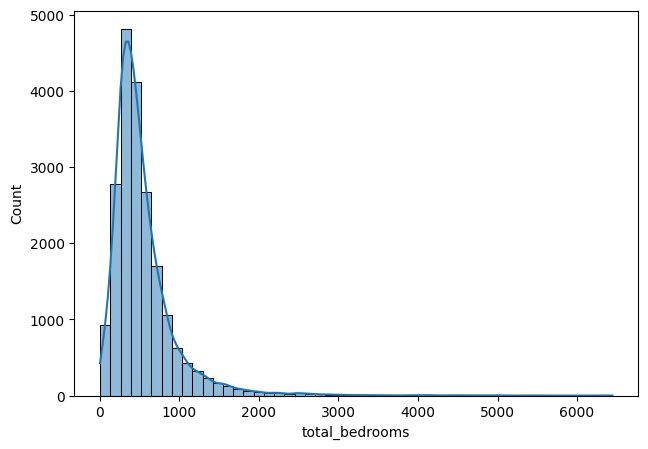

In [14]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.histplot(
    data["total_bedrooms"],
    bins=50,
    kde=True
)
plt.show()


In [15]:
data["total_bedrooms"].skew()

np.float64(3.4595463315233435)

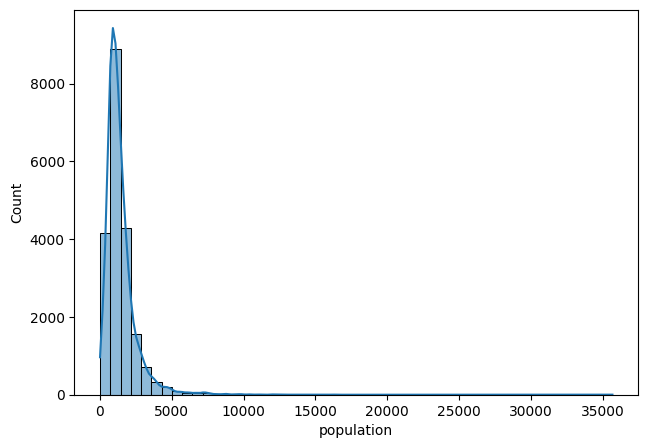

In [16]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.histplot(
    data["population"],
    bins=50,
    kde=True
)
plt.show()


In [17]:
data["population"].skew()

np.float64(4.9600165423853895)

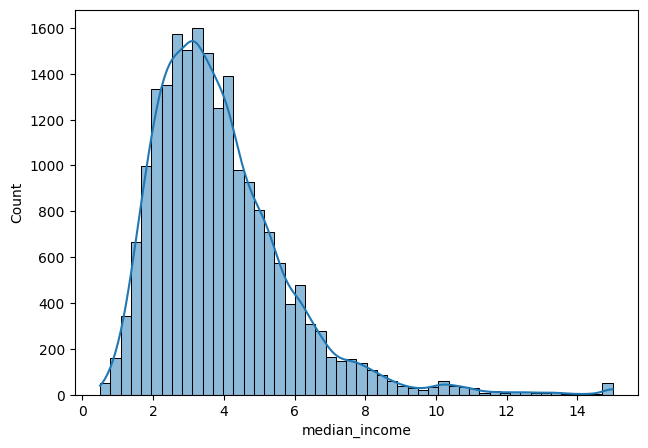

In [18]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.histplot(
    data["median_income"],
    bins=50,
    kde=True
)
plt.show()

In [19]:
data["median_income"].skew()

np.float64(1.6445569163060247)

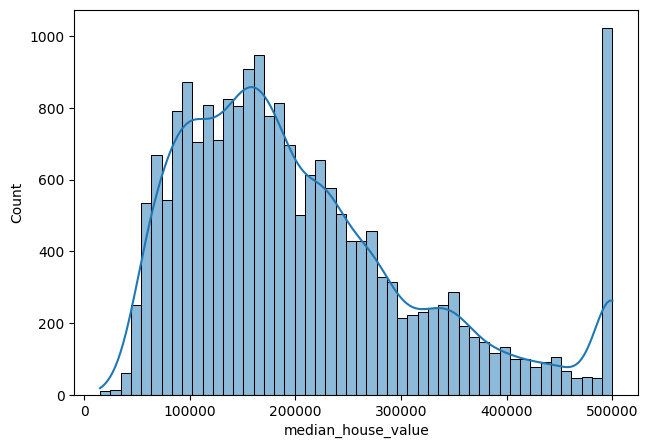

In [20]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.histplot(
    data["median_house_value"],
    bins=50,
    kde=True
)
plt.show()

In [21]:
data["median_house_value"].skew()

np.float64(0.9782898908925556)

In [22]:
data["median_house_value"].describe()

count     20433.000000
mean     206864.413155
std      115435.667099
min       14999.000000
25%      119500.000000
50%      179700.000000
75%      264700.000000
max      500001.000000
Name: median_house_value, dtype: float64

# 4.Log Transformation (for skew) with IQR-based capping (for outliers)

In [23]:
skewed_columns=["total_rooms","median_income","population","households","total_bedrooms"]

In [24]:
for col in skewed_columns:
    data[col]=np.log1p(data[col])

In [25]:
for col in skewed_columns:
    print(col,"skewed_after=",data[col].skew())

total_rooms skewed_after= -1.0812421156590113
median_income skewed_after= 0.22459673895381432
population skewed_after= -1.0480370719997933
households skewed_after= -1.056800932113089
total_bedrooms skewed_after= -0.9928134853509126


In [26]:
target_col = "median_house_value"

Q1 = data[target_col].quantile(0.25)
Q3 = data[target_col].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

data[target_col] = data[target_col].clip(lower=lower, upper=upper)


In [27]:
data["median_house_value"].skew()

np.float64(0.9131047077215607)

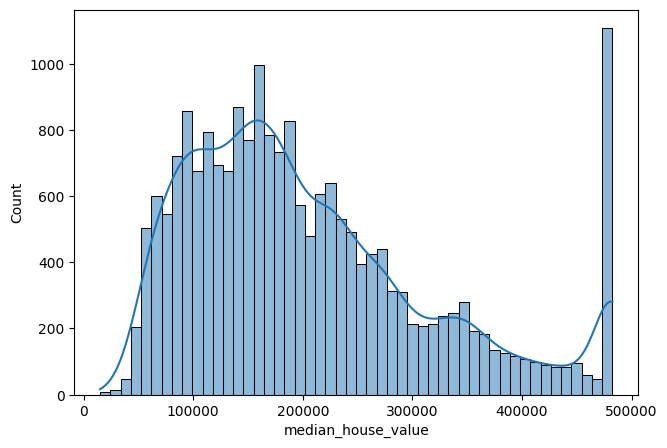

In [76]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,2)
sns.histplot(
    data[target_col],
    bins=50,
    kde=True
)
plt.show()

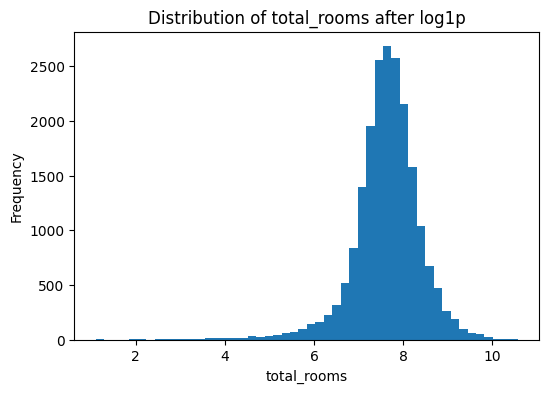

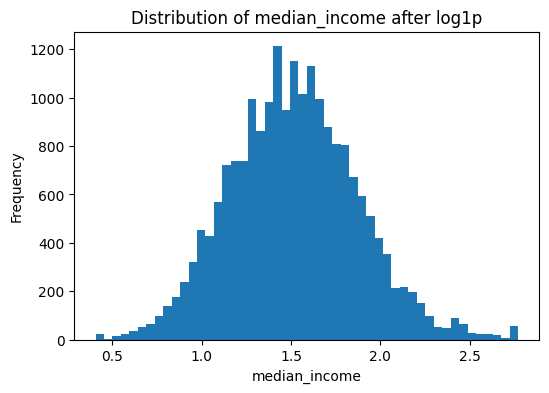

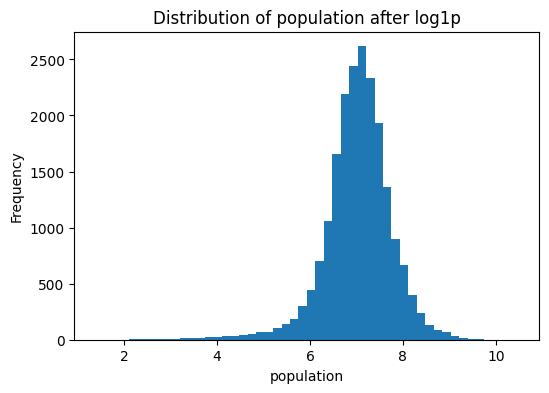

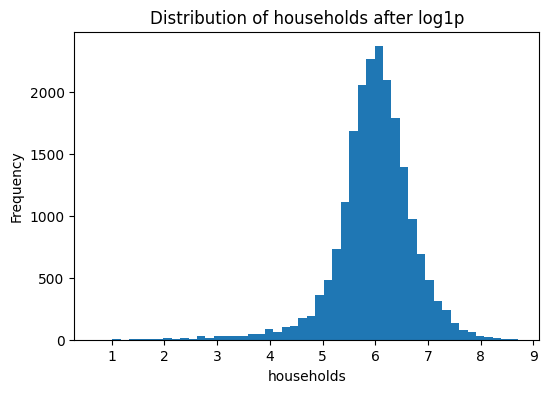

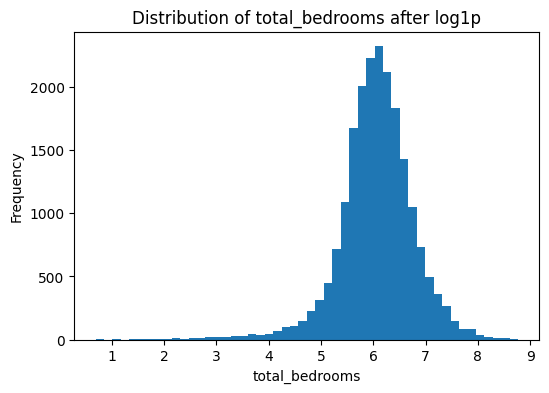

In [28]:
for col in skewed_columns:
    plt.figure(figsize=(6,4))
    plt.hist(data[col], bins=50)
    plt.title(f"Distribution of {col} after log1p")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

In [29]:
for col in skewed_columns:
    Q1=data[col].quantile(0.25)
    Q3=data[col].quantile(0.75)
    IQR=Q3-Q1
    lower=Q1-1.5*IQR
    upper=Q3+1.5*IQR
    data[col]=data[col].clip(lower,upper)

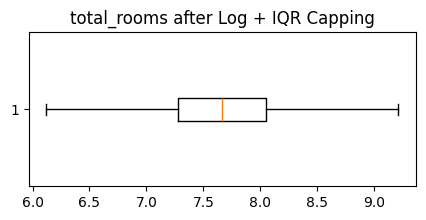

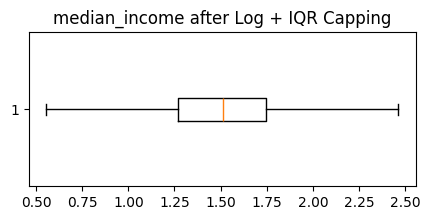

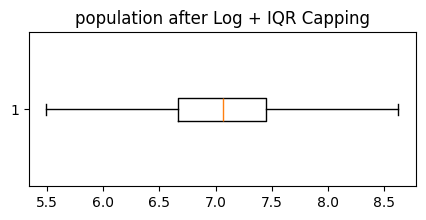

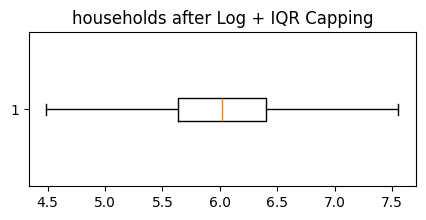

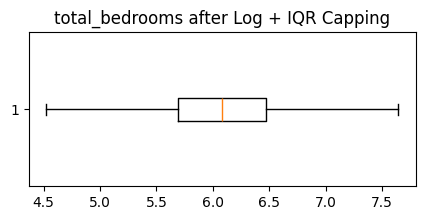

In [30]:
for col in skewed_columns:
    plt.figure(figsize=(5,2))
    plt.boxplot(data[col], vert=False)
    plt.title(f"{col} after Log + IQR Capping")
    plt.show()

In [31]:
X=data.drop("median_house_value",axis=1)
y=data["median_house_value"]

In [32]:
print(y)

0        452600
1        358500
2        352100
3        341300
4        342200
          ...  
20635     78100
20636     77100
20637     92300
20638     84700
20639     89400
Name: median_house_value, Length: 20433, dtype: int64


In [33]:
print(X)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -122.23     37.88                  41     6.781058        4.867534   
1        -122.22     37.86                  21     8.867850        7.009409   
2        -122.24     37.85                  52     7.291656        5.252273   
3        -122.25     37.85                  52     7.150701        5.463832   
4        -122.25     37.85                  52     7.395108        5.638355   
...          ...       ...                 ...          ...             ...   
20635    -121.09     39.48                  25     7.418181        5.926926   
20636    -121.21     39.49                  18     6.548219        5.017280   
20637    -121.22     39.43                  17     7.720905        6.186209   
20638    -121.32     39.43                  18     7.528869        6.016157   
20639    -121.24     39.37                  16     7.932362        6.424869   

       population  households  median_income ocean_

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17727,-121.80,37.32,14,8.392310,6.829794,7.900637,6.793466,1.740940,<1H OCEAN
2057,-119.63,36.64,33,6.944087,5.204007,6.431331,5.164786,1.484033,INLAND
6453,-118.06,34.12,25,8.266678,6.744059,7.522400,6.633318,1.539852,INLAND
4619,-118.31,34.07,28,7.767687,6.856462,7.922986,6.796824,1.174462,<1H OCEAN
15266,-117.27,33.04,27,7.517521,5.973810,7.172425,6.003887,1.515127,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...
11397,-117.97,33.72,24,8.003697,6.216606,7.271009,6.118097,1.860757,<1H OCEAN
12081,-117.54,33.76,5,8.673684,6.943122,8.089176,6.909753,1.757254,<1H OCEAN
5447,-118.42,34.01,42,7.374629,5.913503,6.859615,5.894403,1.410743,<1H OCEAN
866,-122.04,37.57,12,8.651724,6.970730,8.142354,6.964136,1.838627,NEAR BAY


In [36]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14416,-117.24,32.79,20,6.869014,5.631212,6.265301,5.541264,1.431220,NEAR OCEAN
16383,-121.29,38.01,2,8.764678,7.018402,8.110127,6.864848,1.702400,INLAND
7731,-118.14,33.92,31,8.224700,6.749931,7.746733,6.687109,1.440712,<1H OCEAN
1410,-122.07,37.94,30,7.139660,5.624018,6.562444,5.402677,1.358923,NEAR BAY
1335,-121.89,37.99,4,7.683404,6.393591,6.834109,6.135565,1.629554,INLAND
...,...,...,...,...,...,...,...,...,...
8291,-118.15,33.76,36,7.978311,6.666957,7.076654,6.620073,1.525730,NEAR OCEAN
6274,-117.95,34.03,33,7.486053,5.978886,7.325149,5.932245,1.467621,<1H OCEAN
2997,-119.03,35.32,12,7.909122,6.309918,7.166266,6.261492,1.269058,INLAND
13440,-117.42,34.08,28,7.741099,6.040255,7.180070,6.098074,1.500605,INLAND


# 5.Feature Engneering And Feature Scaling

In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler

In [38]:
transfromer=ColumnTransformer(
    transformers=[("ocean_proximity_ohe",
                   OneHotEncoder(sparse_output=False,handle_unknown="ignore"),
                   ["ocean_proximity"]),
                  ("num_scaler",
                   StandardScaler(),["longitude","latitude","housing_median_age","total_rooms","total_bedrooms","population","households","median_income",])])

In [39]:
X_train_transformed = transfromer.fit_transform(X_train)
X_test_transformed  = transfromer.transform(X_test)

In [40]:
print(X_train_transformed)

[[ 1.          0.          0.         ...  1.33355517  1.25201859
   0.63712114]
 [ 0.          1.          0.         ... -0.95839176 -1.33774593
  -0.09019636]
 [ 0.          1.          0.         ...  0.7435501   0.99736771
   0.0678295 ]
 ...
 [ 1.          0.          0.         ... -0.29031846 -0.17758207
  -0.29768586]
 [ 0.          0.          0.         ...  1.7106068   1.52340015
   0.91368014]
 [ 0.          0.          0.         ...  1.06422384  0.74386165
   0.2038205 ]]


In [41]:
feature_names=transfromer.get_feature_names_out()

In [42]:
print(feature_names)

['ocean_proximity_ohe__ocean_proximity_<1H OCEAN'
 'ocean_proximity_ohe__ocean_proximity_INLAND'
 'ocean_proximity_ohe__ocean_proximity_ISLAND'
 'ocean_proximity_ohe__ocean_proximity_NEAR BAY'
 'ocean_proximity_ohe__ocean_proximity_NEAR OCEAN' 'num_scaler__longitude'
 'num_scaler__latitude' 'num_scaler__housing_median_age'
 'num_scaler__total_rooms' 'num_scaler__total_bedrooms'
 'num_scaler__population' 'num_scaler__households'
 'num_scaler__median_income']


In [43]:
X_train_data=pd.DataFrame(X_train_transformed ,columns=feature_names,index=X_train.index)

In [44]:
print(X_train_data)

       ocean_proximity_ohe__ocean_proximity_<1H OCEAN  \
17727                                             1.0   
2057                                              0.0   
6453                                              0.0   
4619                                              1.0   
15266                                             0.0   
...                                               ...   
11397                                             1.0   
12081                                             1.0   
5447                                              1.0   
866                                               0.0   
15948                                             0.0   

       ocean_proximity_ohe__ocean_proximity_INLAND  \
17727                                          0.0   
2057                                           1.0   
6453                                           1.0   
4619                                           0.0   
15266                                        

In [45]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [46]:
rf=RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train_transformed,y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [47]:
y_pred = rf.predict(X_test_transformed)

In [48]:
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R² Score:", r2)
print("MAE:", mae)
print("RMSE:", rmse)

R² Score: 0.828543626683609
MAE: 31091.983141668712
RMSE: 47517.71133465382


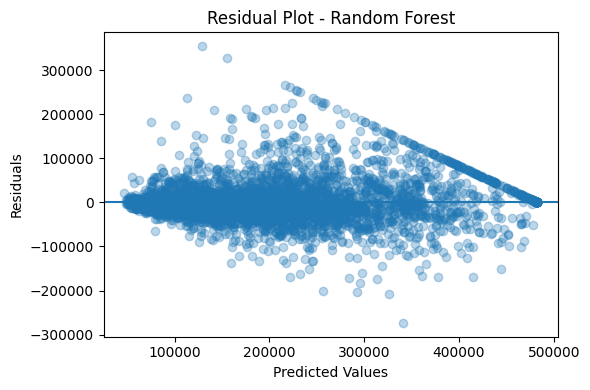

In [50]:
residuals_rf = y_test - y_pred
plt.figure(figsize=(6,4))
plt.scatter(y_pred, residuals_rf, alpha=0.3)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Random Forest")

plt.tight_layout()
plt.savefig("models/residual_plot_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

In [51]:
import joblib
joblib.dump(rf,"random_forest_model.pkl")

['random_forest_model.pkl']

In [52]:
joblib.dump(transfromer,"preprocessing_transformer.pkl")

['preprocessing_transformer.pkl']

In [53]:
import pandas as pd
results_df=pd.DataFrame([{
    "model": "Random Forest",
    "r2": "0.8267",
    "MSA": "31595.71",
    "RMSE": "48673.83",
}])
results_df.to_csv("rf_model_results.csv",index=False)

In [54]:
results_df

,model,r2,MSA,RMSE
0,Random Forest,0.8267,31595.71,48673.83


In [55]:
from sklearn.tree import DecisionTreeRegressor
dt_exp1 = DecisionTreeRegressor(
    max_depth=10,
    min_samples_split=20,
    random_state=42
)
dt_exp1.fit(X_train_transformed, y_train)
y_pred_dt = dt_exp1.predict(X_test_transformed)

In [56]:
dt_results = {
    "R2": r2_score(y_test, y_pred_dt),
    "MAE": mean_absolute_error(y_test, y_pred_dt),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_dt))
}

dt_results

{'R2': 0.7361152324278724,
 'MAE': 39507.546130430324,
 'RMSE': np.float64(58950.27823469636)}

In [57]:
print(X_test_transformed.shape)
print(y_test.shape)


(4087, 13)
(4087,)


In [58]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
model_lr.fit(X_train_transformed,y_train)
y_pred_lr=model_lr.predict(X_test_transformed)

In [59]:
lr_results = {
    "R2": r2_score(y_test, y_pred_lr),
    "MAE": mean_absolute_error(y_test, y_pred_lr),
    "RMSE": np.sqrt(mean_squared_error(y_test, y_pred_lr))
}

lr_results

{'R2': 0.6425451547416597,
 'MAE': 51918.45193371324,
 'RMSE': np.float64(68610.295916291)}

In [60]:
import os
os.makedirs("models", exist_ok=True)

In [61]:
import os
os.getcwd()

'C:\\Users\\Vijay'

In [62]:
import joblib
joblib.dump(model_lr, "models/linear_regression.pkl")

['models/linear_regression.pkl']

In [63]:
joblib.dump(rf, "models/random_forest.pkl")

['models/random_forest.pkl']

In [64]:
joblib.dump(dt_exp1, "models/decision_tree.pkl")

['models/decision_tree.pkl']

In [65]:
joblib.dump(transfromer, "models/preprocessing_transformer.pkl")

['models/preprocessing_transformer.pkl']

In [66]:
import pandas as pd
results_dt=pd.DataFrame([{
    "model": "DecisionTree",
    "r2": "0.734325372562638",
    "MSA": "40353.17852701402",
    "RMSE": "60275.605019543844",
}])
results_dt.to_csv("dt_model_results.csv",index=False)

In [67]:
results_dt

,model,r2,MSA,RMSE
0,DecisionTree,0.734325372562638,40353.17852701402,60275.605019543844


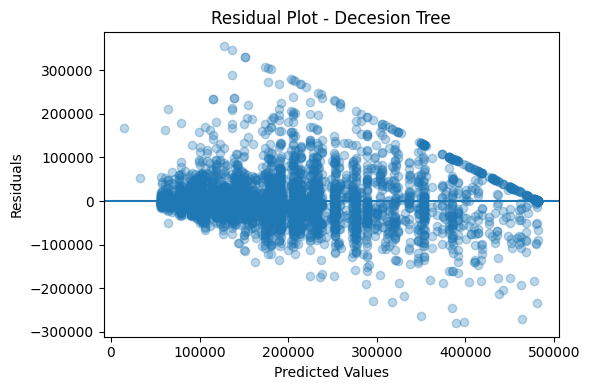

In [72]:
residuals_dt = y_test - y_pred_dt
plt.figure(figsize=(6,4))
plt.scatter(y_pred_dt, residuals_dt, alpha=0.3)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Decesion Tree")
plt.tight_layout()
plt.savefig("models/residual_plot_decision_tree.png", dpi=300, bbox_inches="tight")
plt.show()

In [99]:
import pandas as pd
results_lr=pd.DataFrame([{
    "model": "LinearRegression",
    "r2": "0.6384089367685991",
    "MSA": "52939.13609647011",
    "RMSE": "70319.43657559389",
}])
results_lr.to_csv("lr_model_results.csv",index=False)

In [100]:
results_lr

,model,r2,MSA,RMSE
0,LinearRegression,0.6384089367685991,52939.13609647011,70319.43657559389


In [ ]:
residuals_lr = y_test - y_pred_lr
plt.figure(figsize=(6,4))
plt.scatter(y_pred_lr, residuals_lr, alpha=0.3)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot - Linear Regression")
plt.tight_layout()
plt.savefig("models/residual_plot_Linear_regression.png", dpi=300, bbox_inches="tight")
plt.show()


In [70]:
plt.tight_layout()
plt.savefig("models/residual_plot_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>

In [71]:
plt.savefig("models/residual_plot_random_forest.png", dpi=300, bbox_inches="tight")
plt.show()

<Figure size 640x480 with 0 Axes>